# GPT Remove Particle Elements
---

In [1]:
from distgen import Generator

from gpt import GPT
from gpt.element import Screen
from gpt.lattice import Lattice
from gpt.remove_particles import Aperture
from gpt.remove_particles import CircularAperture

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

## Circular Aperture
This object uses the more general GPT Aperture object, and assumes cylindrical symmetry.

In [2]:
lat = Lattice('aperture_test')
lat.add(CircularAperture('a1', 1e-2, Rmax = 5e-2), ds=0.1)
lat.add(Screen('scr'), ds=0.25, ref_element='beg')

In [3]:
_=lat.write_gpt_lines(output_file='aperture.in')

In [4]:
distgen_yaml = """
n_particle: 1000
species: electron
total_charge: 0 C
random:
    type: hammersley
r_dist:
    type: ru
    max_r: 2 cm
start:
    type: time
"""

In [5]:
D = Generator(distgen_yaml)
P = D.run()
P.pz = 1e3

In [6]:
G = GPT('aperture.in', initial_particles=P)
G.set_variables({'ZSTOP':0.25, 'tmax':50e-8, 'Ntout': 200})
G.run()

/Users/colwyngulliford/GitHub/lume-gpt/src/gpt/parsers.py:228: RuntimeWarning: invalid value encountered in divide
  w = abs(scr['q']*scr['nmacro'])/np.sum(abs(scr['q']*scr['nmacro']))


In [7]:
print(G)


GPT object:
   Original input file: aperture.in
   Template location: /Users/colwyngulliford/GitHub/lume-gpt/examples/elements
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/w8/8n1md1352pzd3nqp0lhc5jy00000gn/T/tmpsgxc5h8v
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.40846681594848633 (sec)


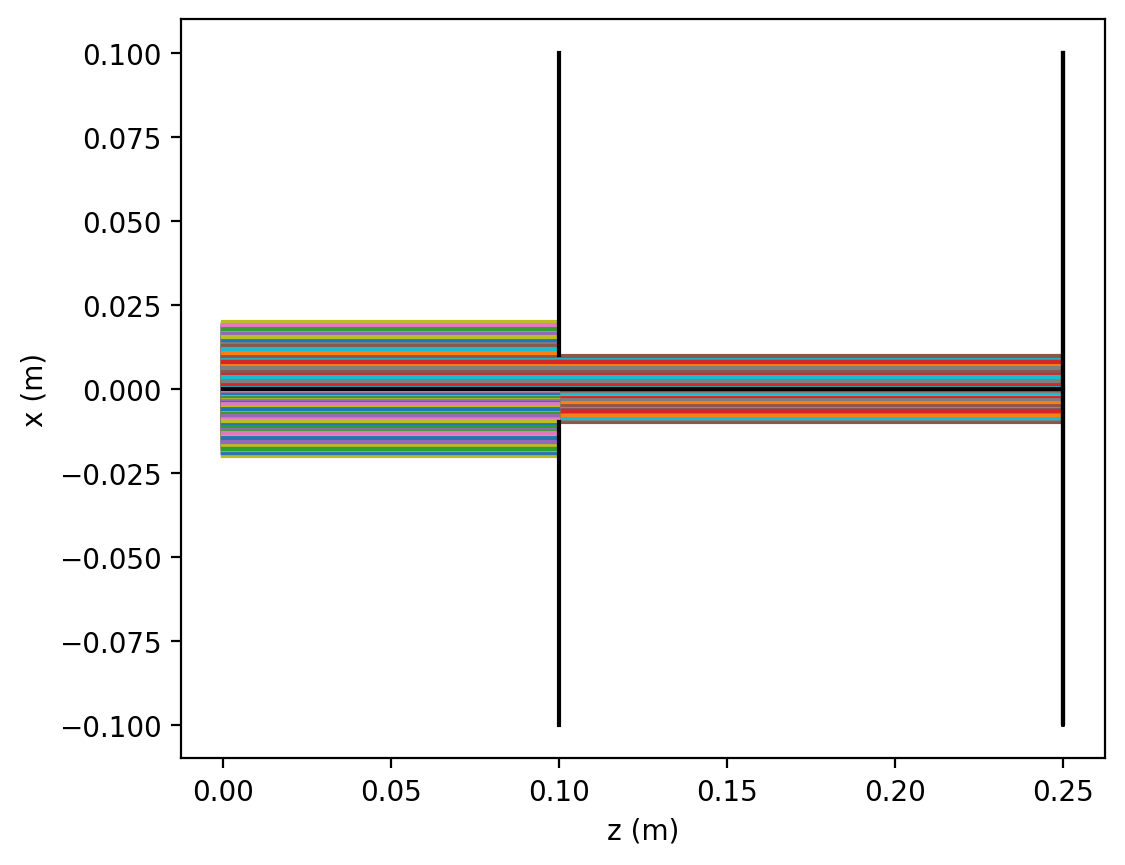

In [8]:
ax = plt.gca()
for ii in range(1, D['n_particle']+1):
    tii = G.trajectory(ii, data_type='tout')
    ax.plot(tii['z'], tii['x'])
ax = lat.plot_floor()

(-20.0, 20.0)

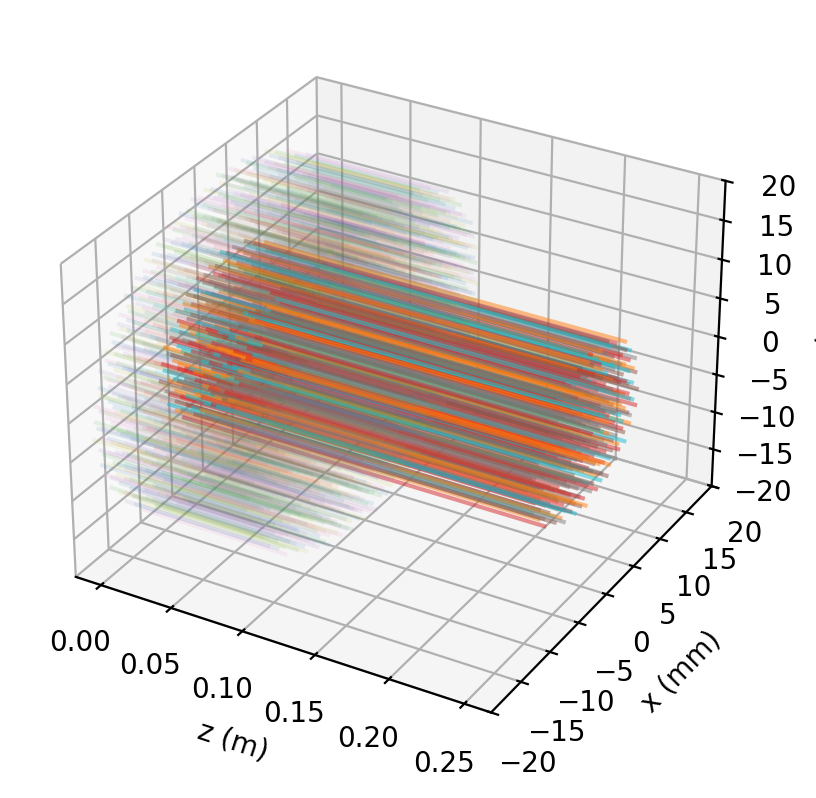

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for ii in range(1, D['n_particle']):
    tii = G.trajectory(ii, data_type='tout')
    if(tii['z'][-1]>0.1):
        ax.plot(tii['x']*1000, tii['y']*1000, tii['z'], zdir='x', alpha=0.5)
    else:
        ax.plot(tii['x']*1000, tii['y']*1000, tii['z'], zdir='x', alpha=0.1)
    
ax.set_xlabel('z (m)');
ax.set_ylabel('x (mm)');
ax.set_zlabel('y (mm)');
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

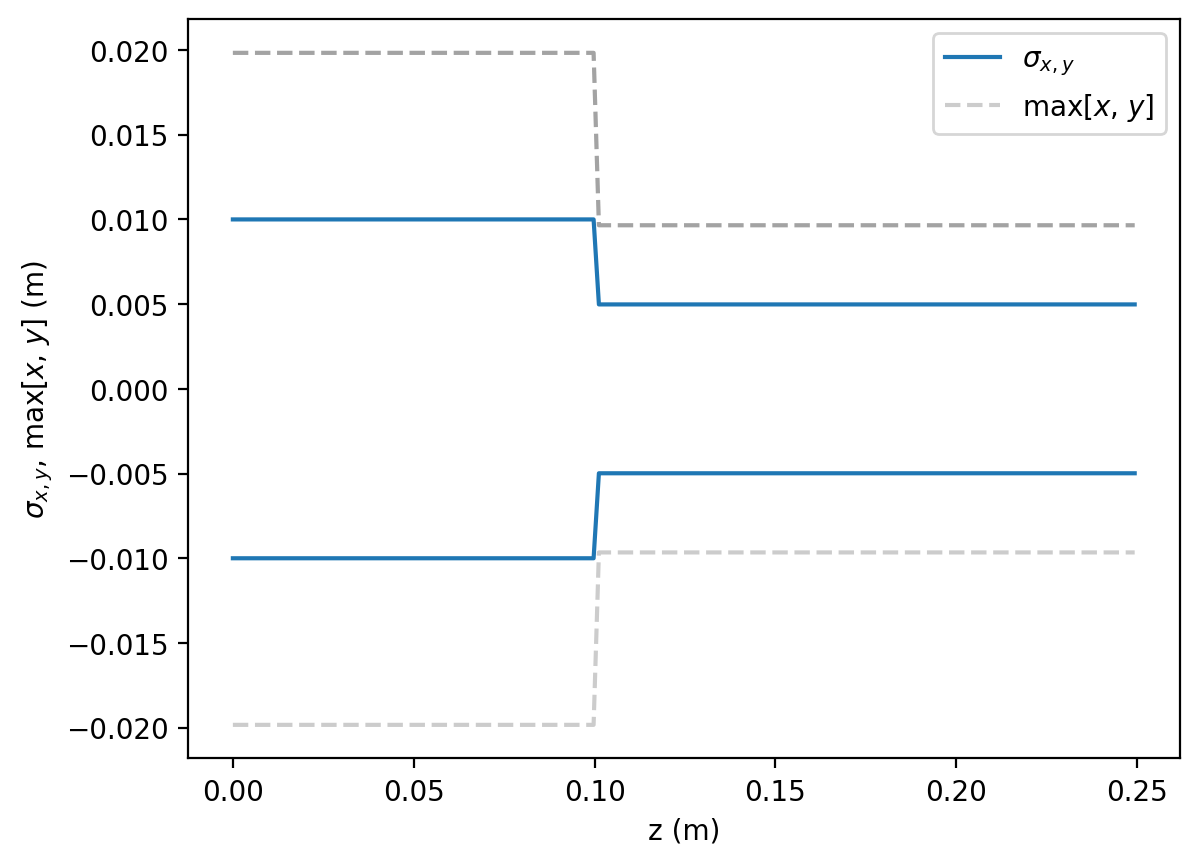

In [10]:
plt.plot(G.tout_stat('mean_z'), +G.tout_stat('sigma_x'))
plt.plot(G.tout_stat('mean_z'), +G.tout_stat('max_x'), '--k', alpha=0.2)
plt.plot(G.tout_stat('mean_z'), -G.tout_stat('sigma_x'), color='tab:blue');
plt.plot(G.tout_stat('mean_z'), +G.tout_stat('max_x'), '--k', alpha=0.2)
plt.plot(G.tout_stat('mean_z'), -G.tout_stat('max_x'), '--k', alpha=0.2);
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_{x,y}$, max[$x$, $y$] (m)')
plt.legend([r'$\sigma_{x,y}$', r'max[$x$, $y$]'])

In [11]:
os.remove('aperture.in')

## Aperture
This wraps the more General GPT Aperture object and allows for elliptical aperture shape or providing a bitmap file.

In [12]:
lat2 = Lattice('aperture_test')
lat2.add(Aperture('a1', a=0.01, b=0.01) , ds=0.1)
lat2.add(Screen('scr'), ds=0.25, ref_element='beg')

In [13]:
_=lat2.write_gpt_lines(output_file='aperture2.in')

In [14]:
G2 = GPT('aperture2.in', initial_particles=P)
G2.set_variables({'ZSTOP':0.25, 'tmax':50e-8, 'Ntout': 200})
G2.run()

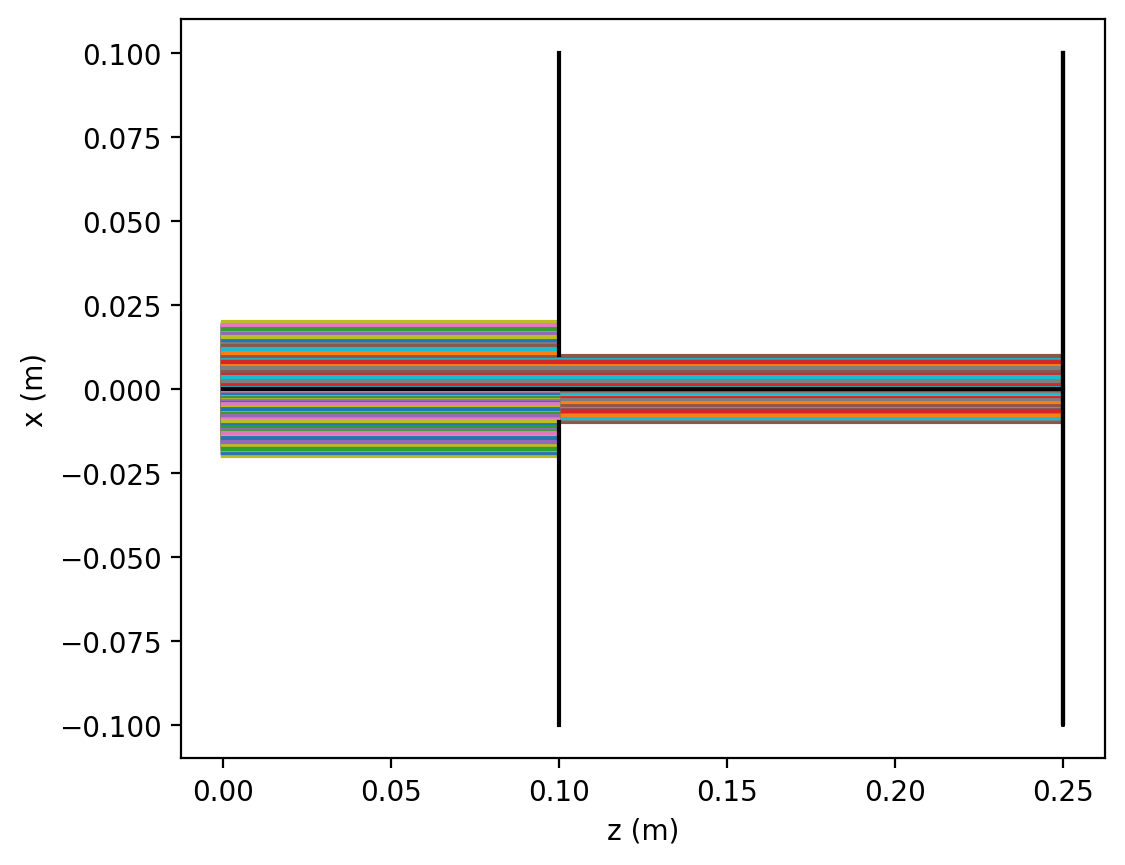

In [15]:
ax = plt.gca()
for ii in range(1, D['n_particle']+1):
    tii = G2.trajectory(ii, data_type='tout')
    ax.plot(tii['z'], tii['x'])
ax = lat.plot_floor()

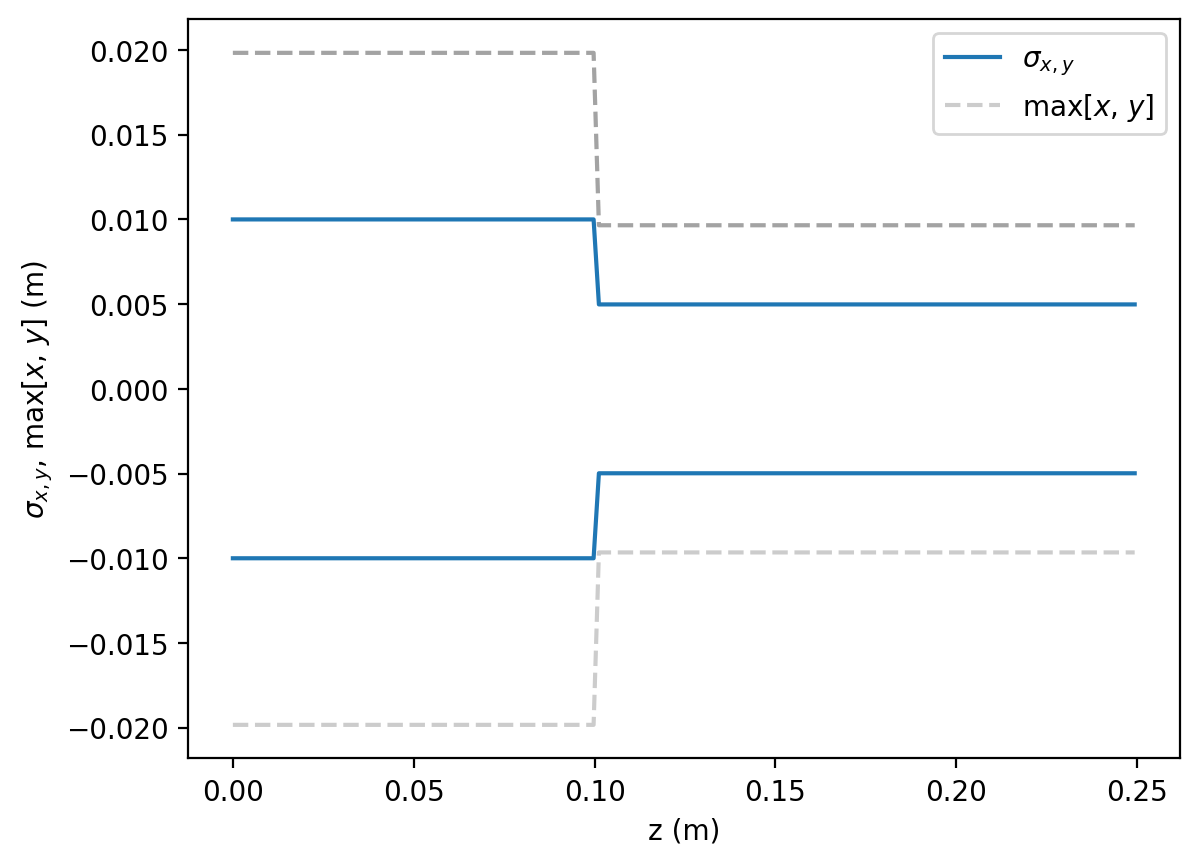

In [16]:
plt.plot(G2.tout_stat('mean_z'), +G2.tout_stat('sigma_x'))
plt.plot(G2.tout_stat('mean_z'), +G2.tout_stat('max_x'), '--k', alpha=0.2)
plt.plot(G2.tout_stat('mean_z'), -G2.tout_stat('sigma_x'), color='tab:blue');
plt.plot(G2.tout_stat('mean_z'), +G2.tout_stat('max_x'), '--k', alpha=0.2)
plt.plot(G2.tout_stat('mean_z'), -G2.tout_stat('max_x'), '--k', alpha=0.2);
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_{x,y}$, max[$x$, $y$] (m)')
plt.legend([r'$\sigma_{x,y}$', r'max[$x$, $y$]'])

In [17]:
lat3 = Lattice('aperture_test')
lat3.add(Aperture('a1', a=0.01, b=0.03) , ds=0.1)
lat3.add(Screen('scr'), ds=0.25, ref_element='beg')

In [18]:
_=lat3.write_gpt_lines(output_file='aperture3.in')

In [19]:
D['r_dist:max_r'] = 6
D['n_particle']=2000
P = D.run()
P.pz = 1e3

In [20]:
G3 = GPT('aperture3.in', initial_particles=P)
G3.set_variables({'ZSTOP':0.25, 'tmax':50e-8, 'Ntout': 200})
G3.run()

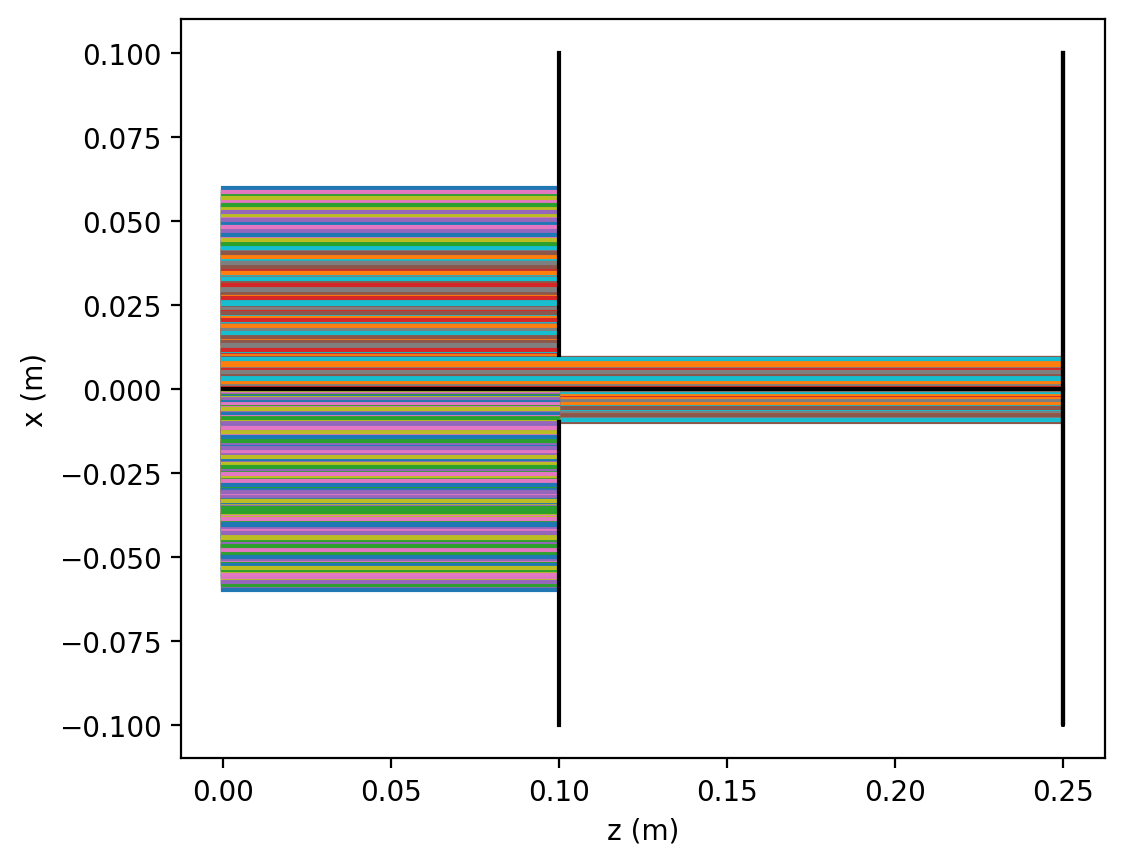

In [21]:
ax = plt.gca()
for ii in range(1, D['n_particle']+1):
    tii = G3.trajectory(ii, data_type='tout')
    ax.plot(tii['z'], tii['x'])
ax = lat.plot_floor()

In [22]:
print(G3)


GPT object:
   Original input file: aperture3.in
   Template location: /Users/colwyngulliford/GitHub/lume-gpt/examples/elements
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/w8/8n1md1352pzd3nqp0lhc5jy00000gn/T/tmpdnskoc5w
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.6160769462585449 (sec)


(-60.0, 60.0)

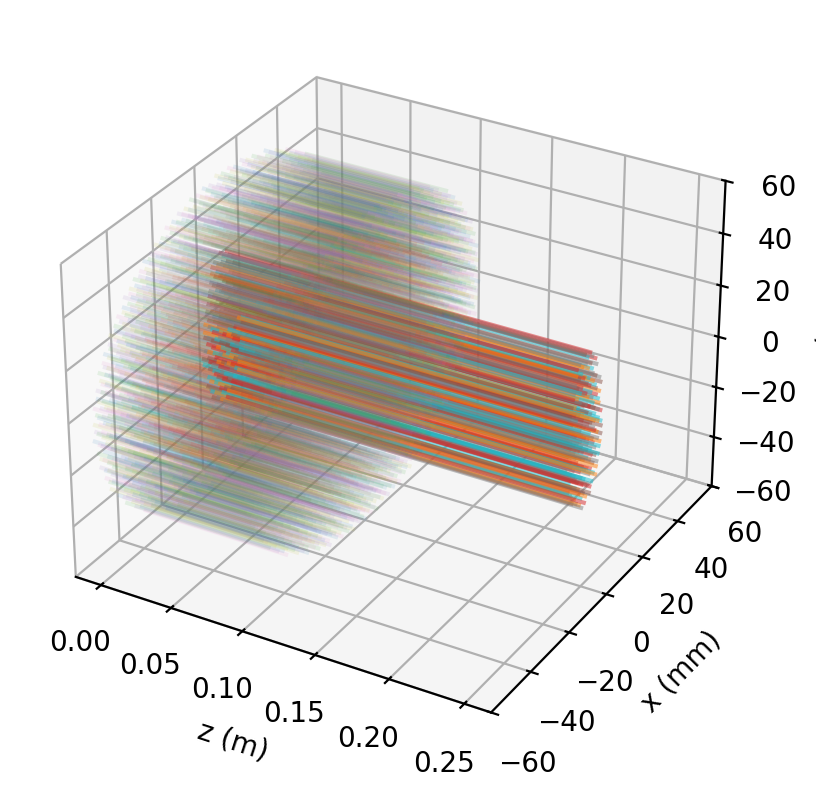

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for ii in range(1, D['n_particle']+1, 1):
    tii = G3.trajectory(ii, data_type='tout')
    if(tii['z'][-1]>0.1):
        ax.plot(tii['x']*1000, tii['y']*1000, tii['z'], zdir='x', alpha=0.5)
    else:
        ax.plot(tii['x']*1000, tii['y']*1000, tii['z'], zdir='x', alpha=0.1)
        
    
ax.set_xlabel('z (m)');
ax.set_ylabel('x (mm)');
ax.set_zlabel('y (mm)');
ax.set_ylim([-60, 60])
ax.set_zlim([-60, 60])

Text(0, 0.5, 'y (cm)')

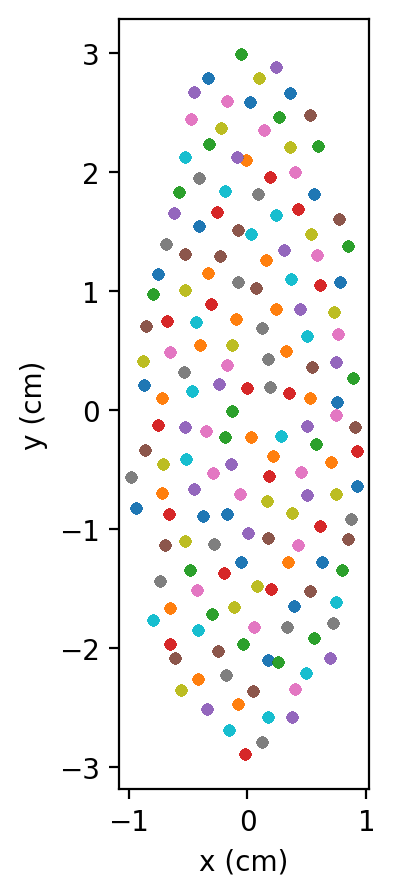

In [24]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
for ii in range(1, D['n_particle']+1, 1):
    tii = G3.trajectory(ii, data_type='tout')
    if(tii['z'][-1]>0.1):
        ax.plot(tii['x']*100, tii['y']*100, '.')
ax.set_aspect('equal')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')

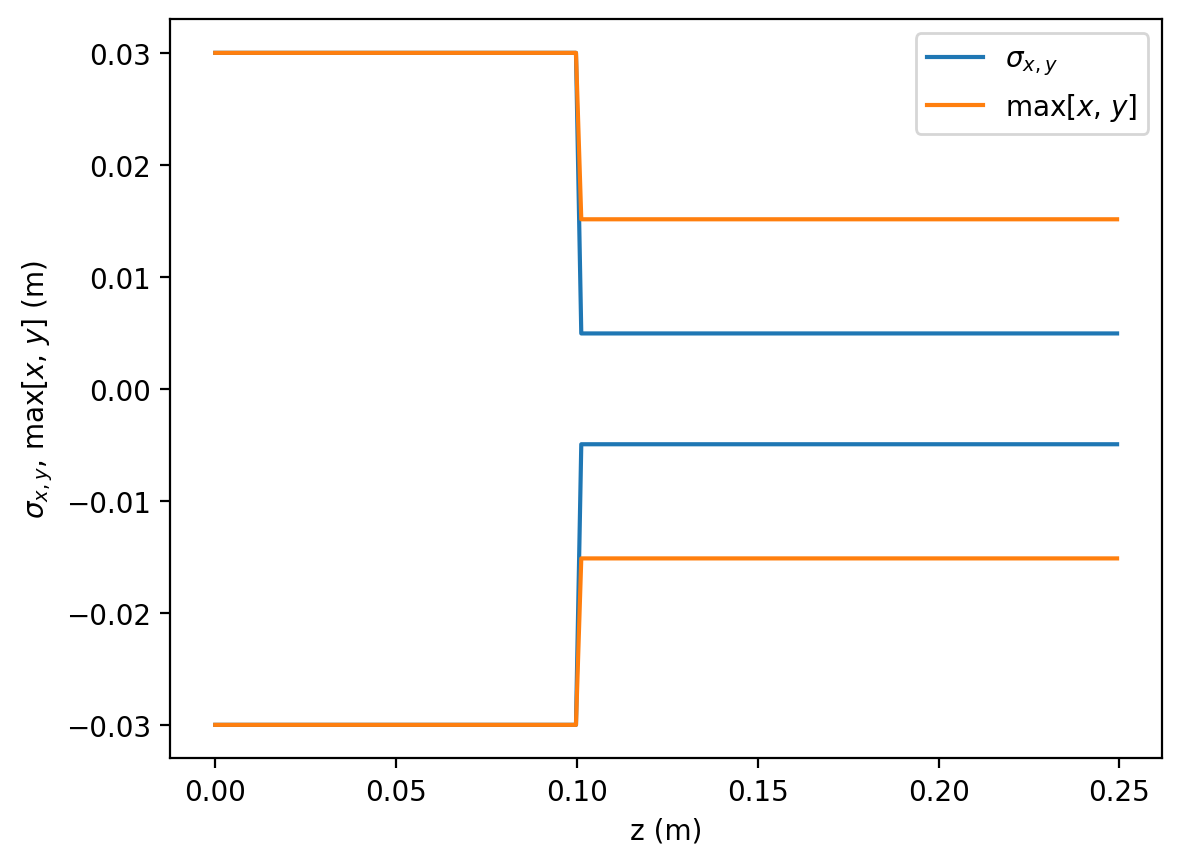

In [25]:
plt.plot(G3.tout_stat('mean_z'), +G3.tout_stat('sigma_x'))
plt.plot(G3.tout_stat('mean_z'), +G3.tout_stat('sigma_y'))

plt.plot(G3.tout_stat('mean_z'), -G3.tout_stat('sigma_x'), color='tab:blue');
plt.plot(G3.tout_stat('mean_z'), -G3.tout_stat('sigma_y'), color='tab:orange')
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_{x,y}$, max[$x$, $y$] (m)')
plt.legend([r'$\sigma_{x,y}$', r'max[$x$, $y$]'])

In [26]:
os.remove('aperture2.in')
os.remove('aperture3.in')